In [4]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision.models import ResNet50_Weights
from torchvision.models import squeezenet1_0, SqueezeNet1_0_Weights

DATA_DIR = r"C:\Users\acer\Desktop\dl project\car-damage-dataset\data1a"

TRAIN_DIR = os.path.join(DATA_DIR, "training")
VAL_DIR   = os.path.join(DATA_DIR, "validation")

BATCH_SIZE = 64
NUM_EPOCHS = 5
IMAGE_SIZE = 128
LEARNING_RATE = 1e-4

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE



device(type='cpu')

In [5]:
# Transforms
train_tf = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

val_tf = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

# Datasets and Loaders
train_ds = datasets.ImageFolder(TRAIN_DIR, transform=train_tf)
val_ds   = datasets.ImageFolder(VAL_DIR, transform=val_tf)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)

num_classes = len(train_ds.classes)

# Model
model = squeezenet1_0(weights=SqueezeNet1_0_Weights.DEFAULT)
model.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=1)
model.num_classes = num_classes
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Tracking
train_losses, val_losses = [], []
train_accs, val_accs = [], []


Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to C:\Users\acer/.cache\torch\hub\checkpoints\squeezenet1_0-b66bff10.pth


100%|██████████| 4.78M/4.78M [00:04<00:00, 1.00MB/s]


In [6]:
for epoch in range(NUM_EPOCHS):
    print(f"\nEpoch {epoch+1}/{NUM_EPOCHS}")
    print("-" * 30)

    # Training
    model.train()
    correct, total, running_loss = 0, 0, 0

    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = outputs.max(1)
        correct += preds.eq(labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = 100 * correct / total

    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation
    model.eval()
    correct, total, running_loss = 0, 0, 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to(DEVICE), labels.to(DEVICE)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()
            total += labels.size(0)

    val_loss = running_loss / len(val_loader.dataset)
    val_acc = 100 * correct / total

    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.2f}%")



Epoch 1/5
------------------------------


Train Loss: 0.6524 | Train Acc: 63.75%
Val Loss:   0.4590 | Val Acc:   83.70%

Epoch 2/5
------------------------------


Train Loss: 0.4081 | Train Acc: 81.20%
Val Loss:   0.3440 | Val Acc:   85.43%

Epoch 3/5
------------------------------


Train Loss: 0.3265 | Train Acc: 86.20%
Val Loss:   0.2622 | Val Acc:   89.57%

Epoch 4/5
------------------------------


Train Loss: 0.2801 | Train Acc: 88.48%
Val Loss:   0.2476 | Val Acc:   91.52%

Epoch 5/5
------------------------------


Train Loss: 0.2450 | Train Acc: 90.16%
Val Loss:   0.2088 | Val Acc:   91.52%


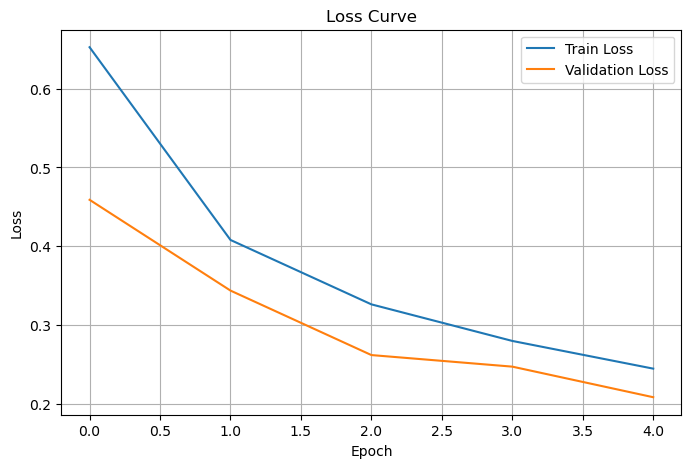

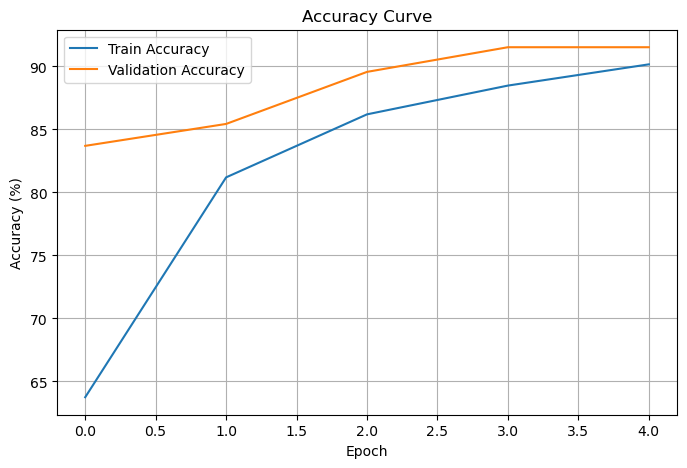

In [7]:
plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)
plt.show()
